Data Preprocessing

In [4]:
import pandas as pd
import numpy as np
import ast

In [6]:
user_interaction = pd.read_csv('data/RAW_interactions.csv')
user_interaction.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [7]:
#Load data 
recipes = pd.read_csv('data/RAW_recipes.csv')
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


EDA:

In [6]:
user_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [7]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [8]:
recipes.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


In [9]:
recipes.isna().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [11]:
#Need datasets with proper description so dropping the 5k appx ones. 
recipes = recipes.dropna()
recipes.isna().sum()

name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
dtype: int64

In [8]:
recipes['tags'][0]

"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']"

In [9]:
recipes['tags'] = recipes['tags'].apply(ast.literal_eval)
tags = recipes['tags'].explode()
tags

0         60-minutes-or-less
0               time-to-make
0                     course
0            main-ingredient
0                    cuisine
                 ...        
231636               dietary
231636          comfort-food
231636            taste-mood
231636                 sweet
231636    number-of-servings
Name: tags, Length: 4141688, dtype: object

In [10]:
len(tags.unique())

552

In [ ]:
#popular tags
tag_counts = tags.value_counts()
tags_filtered = tag_counts[tag_counts >  10000]
tags_filtered

tags
preparation        230546
time-to-make       225326
course             218148
main-ingredient    170446
dietary            165091
                    ...  
savory              10544
sweet               10543
potatoes            10293
summer              10039
vegan               10012
Name: count, Length: 82, dtype: int64

In [12]:
# Nutrition information (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat (PDV), total carbohydrates (PDV))
# Currently a string, need to convert to list then make into seperate columns
recipes['nutrition'] = recipes['nutrition'].apply(ast.literal_eval)
recipes[['calories', 'fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']] = recipes['nutrition'].apply(pd.Series)
recipes = recipes.drop(columns=['nutrition'])
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [13]:
recipes['steps'] = recipes['steps'].apply(ast.literal_eval)
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...",11,[place potatoes in a large pot of lightly salt...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [14]:
recipes['steps'][0]

['make a choice and proceed with recipe',
 'depending on size of squash , cut into half or fourths',
 'remove seeds',
 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece',
 'season with mexican seasoning mix ii',
 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece',
 'season with sweet mexican spice mix',
 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin',
 'be careful not to burn the squash especially if you opt to use sugar or butter',
 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking',
 'if desired , season with salt']

In [ ]:
#ingredients for CBF
recipes['ingredients'] = recipes['ingredients'].apply(ast.literal_eval)
recipes['ingredients'][0]

['winter squash',
 'mexican seasoning',
 'mixed spice',
 'honey',
 'butter',
 'olive oil',
 'salt']

In [ ]:

ingredients = recipes['ingredients'].explode()
ing_counts = ingredients.value_counts()
ing_counts

ingredients
salt                    85746
butter                  54975
sugar                   44535
onion                   39065
water                   34914
                        ...  
hot hungarian pepper        1
noilly prat                 1
ovolini                     1
ginseng extract             1
nepitella                   1
Name: count, Length: 14942, dtype: int64

In [20]:
ing_filetered = ing_counts[ing_counts > 2000]
ing_filetered

ingredients
salt                85746
butter              54975
sugar               44535
onion               39065
water               34914
                    ...  
warm water           2054
almond extract       2046
swiss cheese         2043
ground coriander     2041
mushroom             2020
Name: count, Length: 176, dtype: int64

In [21]:
for ing in list(ing_filetered.index):
    if 'chicken'  in ing:
        print(ing)

chicken broth
chicken stock
boneless skinless chicken breasts
chicken breasts
chicken


TF-IFD and Cosine for CBF

In [22]:
recipes['ingredients'][0]

['winter squash',
 'mexican seasoning',
 'mixed spice',
 'honey',
 'butter',
 'olive oil',
 'salt']

In [23]:
#joining multi-word ingredients to single strings. still in list format for now
def join_ingredients(ingredients):
    return [ingredient.replace(' ', '') for ingredient in ingredients]

recipes['ingredients'] = recipes['ingredients'].apply(join_ingredients)

In [24]:
recipes['ingredients'][0]

['wintersquash',
 'mexicanseasoning',
 'mixedspice',
 'honey',
 'butter',
 'oliveoil',
 'salt']

In [25]:
# Combine ingredients list into a single string
recipes['ingredients_str'] = recipes['ingredients'].apply(lambda x: ' '.join(x))

In [26]:
recipes['ingredients_str'][0]

'wintersquash mexicanseasoning mixedspice honey butter oliveoil salt'

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorize ingredients
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(recipes['ingredients_str'])

In [34]:
tfidf_matrix[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (1, 14748)>

In [35]:
tfidf_matrix.shape

(226657, 14748)

In [28]:
def suggest_recipes(user_ingredients):
    input_ingredients_str = ' '.join([ingredient.replace(' ', '') for ingredient in user_ingredients])
    input_vector = tfidf.transform([input_ingredients_str])
    # Compute cosine similarity between the input vector and recipe vectors
    similarity_scores = cosine_similarity(input_vector, tfidf_matrix).flatten()
    recipes['similarity'] = similarity_scores
    top_recipes = recipes.nlargest(10, 'similarity')[['name', 'minutes', 'tags', 'steps', 'ingredients', 'similarity']]

    
    print("\nTop 10 Suggested Recipes:\n")
    for idx, row in top_recipes.iterrows():
        print(f"Recipe Name: {row['name']}")
        print(f"Preparation Time: {row['minutes']} minutes")
        print(f"Tags: {', '.join(row['tags']) if isinstance(row['tags'], list) else row['tags']}")
        print(f"Ingredients: {', '.join(row['ingredients']) if isinstance(row['ingredients'], list) else row['ingredients']}")
        print(f"Steps: {' '.join(row['steps']) if isinstance(row['steps'], list) else row['steps']}")
        print(f"Similarity Score: {row['similarity']:.2f}")
        print("-" * 50)
    return 
    
    


In [116]:
user_ingredients =['milk', 'flour', 'powderedmilk', 'self-risingflour', 'ghee', 'sugar', 'water', 'rosewater', 'saffron', 'cardamompowder', 'butter']
suggested_recipes = suggest_recipes(user_ingredients)
print(suggested_recipes)


Top 10 Suggested Recipes:

Recipe Name: gulab jamun
Preparation Time: 50 minutes
Tags: 60-minutes-or-less, time-to-make, course, main-ingredient, cuisine, preparation, desserts, eggs-dairy, asian, indian
Ingredients: milk, flour, powderedmilk, self-risingflour, ghee, sugar, water, rosewater, saffron, cardamompowder, butter
Steps: to make ghee: put the butter in a good saucepan and bring to a boil on medium heat then reduce to low now this is what will happen as the butter slowly simmers moisture will be evaporated out of the ghee the white protein-solids from the butter will sink down to the bottom of the pan and slowly turn golden a foam will rise to the surface , and as it cooks will form a bit of a crust the butter will cook into a gold color as well , and it will have a slightly nutty smell when the moisture is gone , the ghee is done decant the oil and save the delicious golden buttery bits on the bottom of the pan for toast , or mixed with veggies or potatoes if you've used salt

In [30]:
#content based filter code for that returns recipe id
def get_content_rec(recipe_id, top_n):
    
    index = recipes[recipes['id'] == recipe_id].index[0]
    input_vector = tfidf_matrix[index]
    similarity_scores = cosine_similarity(input_vector, tfidf_matrix).flatten()
    similar_indices = similarity_scores.argsort()[::-1][1:top_n + 1]
    recommendations = recipes.iloc[similar_indices]['id'].values
    return recommendations
    

In [31]:
get_content_rec(137739, 10)

array([266606, 418516,  35397, 422400, 281234,  77505,  26117,   9022,
       224068,  80832], dtype=int64)

Making Collaborative Filtering Model

In [40]:
user_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [41]:
user_interaction= user_interaction.dropna()
user_interaction.isna().sum()

user_id      0
recipe_id    0
date         0
rating       0
review       0
dtype: int64

In [42]:
user_interaction.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [32]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

In [33]:
# Prepare data for Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_interaction[["user_id", "recipe_id", "rating"]], reader)

In [34]:
# Split data into training and testing
trainset, testset = train_test_split(data, test_size=0.2)

# Train SVD model
model = SVD()
model.fit(trainset)


In [35]:
user_id = 38094
recipe_id = 40893
prediction = model.predict(user_id, recipe_id)
print(prediction)

user: 38094      item: 40893      r_ui = None   est = 4.77   {'was_impossible': False}


Collaborative filtering function

In [37]:
def recommend_cf(user_id, n=10):
    predictions = [
        (recipe_id, model.predict(user_id, recipe_id).est)
        for recipe_id in recipes["id"].unique()
    ]
    #Sort by predicted rating
    predictions = sorted(predictions, key=lambda x: x[1], reverse=True)[:n]
    result = [x[0] for x in predictions]
    #print(f"\nFinal Recommendations for User-{user_id}:")
    #for rec in result:
        #print(f"Recipe ID: {rec[0]}, Predicted Rating: {rec[1]}")
    
    return result



In [40]:
recommend_cf(8937,10)

[74300, 19424, 486261, 204071, 51650, 100450, 31504, 73518, 67778, 169384]

Hybrid Approach

In [50]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,fat,sugar,sodium,protein,saturated_fat,carbohydrates,ingredients_str,similarity
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook thi...,"[wintersquash, mexicanseasoning, mixedspice, h...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,wintersquash mexicanseasoning mixedspice honey...,1.000000
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[preparedpizzacrust, sausagepatty, eggs, milk,...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,preparedpizzacrust sausagepatty eggs milk salt...,0.000000
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...",6,"[brown ground beef in large pot, add chopped o...",this modified version of moms chili was a hit ...,"[groundbeef, yellowonions, dicedtomatoes, toma...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,groundbeef yellowonions dicedtomatoes tomatopa...,0.011526
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...",11,[place potatoes in a large pot of lightly salt...,this is a super easy great tasting make ahead ...,"[spreadablecheesewithgarlicandherbs, newpotato...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,spreadablecheesewithgarlicandherbs newpotatoes...,0.037584
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dhs amish mother raised him on this recipe ...,"[tomatojuice, applecidervinegar, sugar, salt, ...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,tomatojuice applecidervinegar sugar salt peppe...,0.011258


In [51]:
user_interaction.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


Simple CBF - CF reccomendation based on user_id (experimental)

In [52]:
def get_hybrid_recommendations(user_id, recipe_id, top_n):
    content_based_recommendations = get_content_rec(recipe_id, top_n)
    collaborative_filtering_recommendations = recommend_cf(user_id, top_n)
    hybrid_recommendations = list(set(content_based_recommendations + collaborative_filtering_recommendations))
    return hybrid_recommendations[:top_n]

In [53]:
user_id = 8937
top_n = 10
recipe_id = 137739	
hybrid_recommendations = get_hybrid_recommendations(user_id, recipe_id, top_n)


print(f"Hybrid Recommendations for User {user_id}:")
for i, recommendation in enumerate(hybrid_recommendations):
    print(f"{i + 1}. Recipe ID: {recommendation}")

Hybrid Recommendations for User 8937:
1. Recipe ID: 739235
2. Recipe ID: 516708
3. Recipe ID: 9669
4. Recipe ID: 180996
5. Recipe ID: 416173
6. Recipe ID: 208559
7. Recipe ID: 274870
8. Recipe ID: 145078
9. Recipe ID: 529912
10. Recipe ID: 452511


In [54]:

import matplotlib.pyplot as plt

In [55]:
def visualize_recommendations(user_id, n):
    recommendations = recommend_cf(user_id, n)   
   
    predicted_ratings = [model.predict(user_id, recipe_id).est for recipe_id in recommendations]    
    if len(predicted_ratings) == 0:
        print("No valid predictions.")
        return    
    
    print(f"Recommendations: {recommendations}")
    print(f"Predicted Ratings: {predicted_ratings}")    
    plt.figure(figsize=(10, 6))
    plt.scatter(predicted_ratings, recommendations, color='skyblue')
    plt.xlabel('Predicted Rating')
    plt.ylabel('Recipe ID')
    plt.title(f'Top {n} Recipe Recommendations for User {user_id}')
    plt.gca().invert_yaxis() 
    plt.show()


Recommendations: [8264, 33995, 494515, 94308, 134939, 131054, 118961, 647, 515167, 104158, 29441, 66241, 486261, 132052, 51351, 274110, 163311, 134051, 495124, 95017, 56453, 29635, 26912, 12648, 37841, 223971, 13285, 14257, 16655, 18914, 187415, 124617, 19537, 474520, 494560, 4218, 162841, 64895, 69443, 295835, 97243, 179903, 89007, 188042, 74301, 88939, 411937, 113193, 92016, 486496]
Predicted Ratings: [4.901656290810636, 4.865225090348787, 4.844833464009258, 4.826694499076529, 4.825281028774624, 4.820275387084812, 4.819744481827119, 4.813128039343377, 4.812585529125182, 4.811978163010222, 4.810984081738378, 4.810069907509898, 4.809969710245558, 4.807897489341183, 4.802590403263975, 4.8020803134338745, 4.80021360365036, 4.800079208404688, 4.800027936560975, 4.799425944875929, 4.794177858633747, 4.791262044486446, 4.790289532359505, 4.790262069670345, 4.789568085932674, 4.788440800567573, 4.786779351514233, 4.784555569256219, 4.782186089744239, 4.781669141205698, 4.781571485092248, 4.7

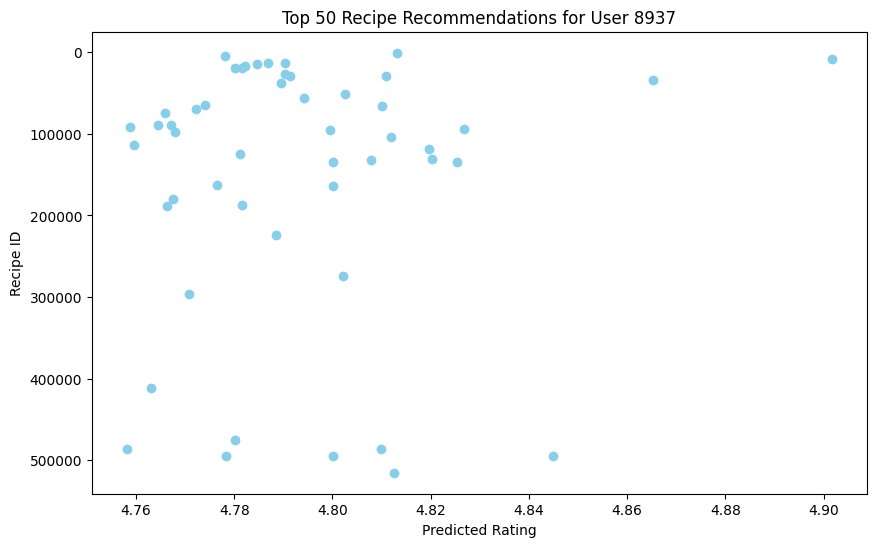

In [56]:
user_id = 8937

visualize_recommendations(user_id, 50)

Working towards Hybrid Recommendation : NLP integration along with Ingredient and Constraint based CBF with CF.

In [57]:
user_interaction["review"]

0          Great with a salad. Cooked on top of stove for...
1          So simple, so delicious! Great for chilly fall...
2          This worked very well and is EASY.  I used not...
3          I made the Mexican topping and took it to bunk...
4          Made the cheddar bacon topping, adding a sprin...
                                 ...                        
1132362    Another approach is to start making sauce with...
1132363    These were so delicious!  My husband and I tru...
1132364    WOW!  Sometimes I don't take the time to rate ...
1132365    Very good!  I used regular port as well.  The ...
1132366    I am so glad I googled and found this here. Th...
Name: review, Length: 1132198, dtype: object

In [41]:
def extract_preferences(tags):
    dietary_restrictions = []
    cuisines = []

    dietary_keywords = ['vegetarian', 'vegan', 'gluten-free', 'dairy-free', 'low-carb', 'keto']
    cuisine_keywords = ['italian', 'mexican', 'chinese', 'indian', 'french', 'thai', 'japanese', 'american', 'greek', 'spanish']

    for tag in tags:
        tag_lower = tag.lower()
        for keyword in dietary_keywords:
            if keyword in tag_lower:
                dietary_restrictions.append(keyword)
        for keyword in cuisine_keywords:
            if keyword in tag_lower:
                cuisines.append(keyword)

    return dietary_restrictions, cuisines

In [42]:
# Preprocess the recipes dataframe

recipes['dietary_preferences'], recipes['cuisine_preferences'] = zip(*recipes['tags'].apply(extract_preferences))


In [92]:
#print top 10 most popular recipe from user_interaction dataset
user_interaction['recipe_id'].value_counts().head(10)


recipe_id
2886     1609
27208    1601
89204    1579
39087    1448
67256    1322
54257    1305
22782    1234
32204    1220
69173     997
68955     904
Name: count, dtype: int64

In [65]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenize descriptions
recipes['description_tokens'] = recipes['description'].apply(word_tokenize)

# Vectorize ingredients or reviews using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  
tfidf_matrix = tfidf.fit_transform(recipes['description'])



In [70]:
#Tokenize reviews
user_interaction['review_tokens'] = user_interaction['review'].apply(word_tokenize)

# Vectorize reviews using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit vocabulary to 5000 terms
tfidf_matrix = tfidf.fit_transform(user_interaction['review'])

TF-IDF approach to NLP preference extraction.

In [43]:

user_reviews = user_interaction.groupby('user_id')['review'].apply(lambda x: ' '.join(x.fillna(''))).reset_index()

In [55]:
user_reviews.head()

,user_id,review
0,1533,WOW this was wonderful. Your mouth just explod...
1,1535,"After being w/o power all day, it came back on..."
2,1581,"I also have done this for years, I think I rea..."
3,1634,Very Good ... and Thank You. Learning to flavo...
4,1676,Used 10 drops Tobasco instead of cayenne peppe...


In [60]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226570 entries, 0 to 226569
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  226570 non-null  int64 
 1   review   226570 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.5+ MB


In [61]:
user_reviews['review'][0]

'WOW this was wonderful. Your mouth just explodes with flavor. I would love to true using sole to. I served it sauteed spinach with bacon. This was just marvelous thanks so much whoever you are. Great recipe for the contest worth 10 stars. Good Luck. I made this with noodles.\r\nI also left out the grapes, (i don\'t like warm grapes) It turned out lovely. I love tarragon and thats why i picked this dish. Going to add to my cookbook, recipes to make over and over. excellent. Derf, My husband says 100 stars, he drooled and whinned when the were all gone. Great taste, I never changed a thing. I served it with my bbq oven chicken and Dressed Peas by Bergy #14953 great meal. Thanks so much. Its a keeper or my husband will whine. tc Lennie these have great flavor I served them with the Easy Chutney Chicken Kebabs and a tossed green salad..wonderful thanks. I was a little worried about trying this, but it worked. I used the round steak and had no trouble at all, The sause was a little thin an

In [45]:

tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
user_review_vectors = tfidf_vectorizer.fit_transform(user_reviews['review'])

In [46]:

recipe_vectors = tfidf_vectorizer.transform(recipes['description'].fillna(''))

In [134]:
recipes['description'][0]

'autumn is my favorite time of year to cook this recipe \r\ncan be prepared either spicy or sweet your choice\r\ntwo of my posted mexicaninspired seasoning mix recipes are offered as suggestions'

In [137]:
#joining multi-word tags to single strings. still in list format for now
def join_tags(tags):
    return [ingredient.replace('-', '') for ingredient in tags]

recipes['tags_str'] = recipes['tags'].apply(join_tags)

In [138]:
# Combine ingredients list into a single string
recipes['tags_str'] = recipes['tags'].apply(lambda x: ' '.join(x))

In [143]:
recipes['tags_str'][0]

'60-minutes-or-less time-to-make course main-ingredient cuisine preparation occasion north-american side-dishes vegetables mexican easy fall holiday-event vegetarian winter dietary christmas seasonal squash'

The idea is to achieve a balanced and comprehensive similarity score, especially when integrated with user reviews.

In [ ]:

recipe_tags = recipes['tags_str'].fillna('')  # A list of tags for each recipe
recipe_descriptions = recipes['description'].fillna('')  # A list of descriptions for each recipe


In [151]:
recipe_info = [' '.join([tag, description]) for tag, description in zip(recipe_tags, recipe_descriptions)]


In [152]:
recipe_info_vectors = tfidf_vectorizer.fit_transform(recipe_info)

In [167]:
# Check the dimensions
print("User review vectors shape:", user_review_vectors.shape)
print("Recipe vectors shape:", recipe_vectors.shape)
print("Recipe vectors + Tags vectors shape:", recipe_info_vectors.shape)


User review vectors shape: (226570, 10000)
Recipe vectors shape: (231637, 10000)
Recipe vectors + Tags vectors shape: (231637, 10000)


In [62]:
user_reviews[user_reviews['user_id'] == user_id].index

Index([3935], dtype='int64')

In [ ]:
def recommend_recipes_tfidf(user_id, top_n=5):
    #index of the user
    user_idx = user_reviews[user_reviews['user_id'] == user_id].index
    if not len(user_idx):
        return "No reviews found for this user."
    
    user_vector = user_review_vectors[user_idx[0]]
    similarities = cosine_similarity(user_vector, recipe_vectors).flatten()
    
    # similarity scores to recipes
    recipes['similarity_score'] = similarities
    return recipes.sort_values('similarity_score', ascending=False).head(top_n)[['id', 'name', 'similarity_score']]

# Test NLP based CBF with TF-IDF
print(recommend_recipes_tfidf(user_id=1581))


            id                                               name  \
210060  335678                             texas bacon stroganoff   
197930  496625  spinach salad w  pan seared scallops and warm ...   
192532  287639            southern rice with bacon flavored gravy   
32514   529732       butternut squash soup with bacon and cheddar   
12573   324517                                    bacon meatballs   

        similarity_score  
210060          0.442408  
197930          0.365603  
192532          0.363584  
32514           0.351404  
12573           0.351404  


CBF with  NLP based on ingredients and constraints

In [160]:
def cbf_nlp(user_ingredients, user_id, alpha=0.5,max_time = None, dietary_restrictions=None, cuisine_preferences=None):
    #Process ingredients input
    input_ingredients_str = ' '.join([ingredient.replace(' ', '') for ingredient in user_ingredients])
    input_vector = tfidf.transform([input_ingredients_str])  # Ingredients vector

    # Compute cosine similarity for ingredients
    ingredient_similarity_scores = cosine_similarity(input_vector, tfidf_matrix).flatten()

    # Get user review vector (if user_id exists in reviews)
    user_idx = user_reviews[user_reviews['user_id'] == user_id].index
    
    if not len(user_idx):
        print("No reviews found for this user. Using only ingredient-based recommendations.")
        recipes['similarity'] = ingredient_similarity_scores
    else:
        user_vector = user_review_vectors[user_idx[0]]  # User's review vector
        review_similarity_scores = cosine_similarity(user_vector, recipe_vectors).flatten()

        #Combine ingredient and review similarities
        combined_similarity_scores = (
            alpha * ingredient_similarity_scores +
            (1 - alpha) * review_similarity_scores
        )
        recipes['similarity'] = combined_similarity_scores
        
        
    filtered_recipes = recipes.copy()
    # Filter by preparation time
    if max_time is not None:
        filtered_recipes = filtered_recipes[filtered_recipes['minutes'] <= max_time]

    # Filter by dietary restrictions
    if dietary_restrictions is not None:
        filtered_recipes = filtered_recipes[filtered_recipes['tags'].apply(
            lambda tags: all(diet in tags for diet in dietary_restrictions)
        )]

    # Filter by cuisine preferences
    if cuisine_preferences is not None:
        filtered_recipes = filtered_recipes[filtered_recipes['tags'].apply(
            lambda tags: any(cuisine in tags for cuisine in cuisine_preferences)
        )]

    # Get top recommendations
    top_recipes = filtered_recipes.nlargest(10, 'similarity')[['name', 'id', 'minutes', 'tags', 'steps', 'ingredients', 'similarity']]

    
    print("\nTop 10 Suggested Recipes:\n")
    for idx, row in top_recipes.iterrows():
        #print dietary pref and cuisine pref
        
        print(f"Recipe Name: {row['name']}")        
        print(f"Recipe ID: {row['id']}")        
        print(f"Preparation Time: {row['minutes']} minutes")
        print(f"Tags: {', '.join(row['tags']) if isinstance(row['tags'], list) else row['tags']}")
        print(f"Ingredients: {', '.join(row['ingredients']) if isinstance(row['ingredients'], list) else row['ingredients']}")
        print(f"Steps: {' '.join(row['steps']) if isinstance(row['steps'], list) else row['steps']}")
        print(f"Similarity Score: {row['similarity']:.2f}")
        print("-" * 50)

    return top_recipes


In [162]:
user_ingredients = ['ground beef', 'onion', 'salt', 'pepper']
user_id = None
cuisine_preferences = ['mexican']
dietary_restrictions = ['gluten-free', 'low-carb']
cbf_nlp(user_ingredients, user_id, alpha=0.5, max_time=30, dietary_restrictions=dietary_restrictions, cuisine_preferences=cuisine_preferences)

No reviews found for this user. Using only ingredient-based recommendations.

Top 10 Suggested Recipes:

Recipe Name: easy authentic guacamole
Recipe ID: 287183
Preparation Time: 15 minutes
Tags: 15-minutes-or-less, time-to-make, course, main-ingredient, cuisine, preparation, occasion, north-american, low-protein, appetizers, lunch, snacks, vegetables, mexican, easy, no-cook, beginner-cook, dinner-party, finger-food, vegetarian, dips, dietary, gluten-free, low-cholesterol, low-carb, healthy-2, free-of-something, low-in-something, presentation, technique
Ingredients: avocados, limejuice, salt, pepper, plumtomatoes, onion, jalapeno
Steps: wash and discard the peels and seeds of your avocados and put the remaining flesh in a medium sized bowl add lime juice , salt and pepper and mash into the avocado with a fork or potato masher until smooth dice tomatoes , onion and jalapeo and stir into avocado mixture add more salt to taste storing: put into serving dish and cover with plastic wrap so 

,name,id,minutes,tags,steps,ingredients,similarity
74907,easy authentic guacamole,287183,15,"[15-minutes-or-less, time-to-make, course, mai...",[wash and discard the peels and seeds of your ...,"[avocados, limejuice, salt, pepper, plumtomato...",0.255142
100648,guacamole,34233,15,"[15-minutes-or-less, time-to-make, course, mai...","[halve avocados, remove fruit by running spoon...","[avocados, lime,juiceof, tomatoes, onion, pepp...",0.241109
100668,guacamole for 1 or 2,12752,20,"[30-minutes-or-less, time-to-make, course, cui...","[mix all ingredients together , do not puree i...","[avocado, greenonion, lemonjuice, tomatoes, ta...",0.187202
208235,tammi rodriguez s secret garden fresh salsa,5417,0,"[15-minutes-or-less, time-to-make, course, cui...",[put all items in blender and chop for 30-60 s...,"[tomatoes, greenonion, cilantro, serranochilie...",0.170562
134153,mexican cilantro slaw,26859,15,"[15-minutes-or-less, time-to-make, course, mai...","[mix all the ingredients, season to taste, ref...","[greencabbage, redcabbage, cilantro, limejuice...",0.139756
47298,chile con queso chile cheese dip,29755,25,"[30-minutes-or-less, time-to-make, course, mai...","[in a medium skillet , cook onion in butter un...","[onion, butter, tomatoes, greenchilipeppers, s...",0.133520
48951,chipotle s guacamole,36679,10,"[15-minutes-or-less, time-to-make, course, cui...",[mash up avocado with a fork or electric mixer...,"[avocado, freshlimejuice, freshcilantro, onion...",0.128894
134807,mexican vegetable salsa,25507,15,"[15-minutes-or-less, time-to-make, course, mai...",[mix all the ingredients except lime juice and...,"[tomatoes, onion, cucumber, radishes, cilantro...",0.118083
229071,year round salsa,25798,20,"[30-minutes-or-less, time-to-make, course, mai...","[stir all the ingredients together in a bowl ,...","[crushedtomatoes, freshjalapenos, onion, garli...",0.101746
47312,chile garden salsa,28205,10,"[15-minutes-or-less, time-to-make, course, mai...",[chop one of the tomatoes coarsely and place i...,"[tomatoes, onion, greenonions, jalapenochiles,...",0.095773


In [117]:
user_interaction = user_interaction.reset_index(drop=True)


Final Hybrid System: CBF w NLP and CF 

In [158]:
def suggest_recipes_hybrid(
    user_ingredients, user_id, alpha=0.5, beta=0.3, max_time=None, dietary_restrictions=None, cuisine_preferences=None
):
    """
    Suggest recipes using a hybrid recommendation approach.
    Combines content-based filtering (CBF) with collaborative filtering (CF).
    """
    #Process ingredients input
    input_ingredients_str = ' '.join([ingredient.replace(' ', '') for ingredient in user_ingredients])
    input_vector = tfidf.transform([input_ingredients_str])  # Ingredients vector

    # Compute cosine similarity for ingredients
    ingredient_similarity_scores = cosine_similarity(input_vector, tfidf_matrix).flatten()

    # Get user review vector (if user_id exists in reviews)
    user_idx = user_reviews[user_reviews['user_id'] == user_id].index
    
    if not len(user_idx):
        print("No reviews found for this user. Using only ingredient and CF-based recommendations.")
        recipes['similarity'] = ingredient_similarity_scores
        review_similarity_scores = None
    else:
        user_vector = user_review_vectors[user_idx[0]]  # User's review vector
        review_similarity_scores = cosine_similarity(user_vector, recipe_info_vectors).flatten()

        #Combine ingredient and review similarities
        combined_similarity_scores = (
            alpha * ingredient_similarity_scores +
            (1 - alpha) * review_similarity_scores
        )
        recipes['similarity'] = combined_similarity_scores

    #Get CF predictions
    cf_predictions = {
        recipe_id: model.predict(user_id, recipe_id).est for recipe_id in recipes['id']
    }
    recipes['cf_score'] = recipes['id'].map(cf_predictions)

    # Combine CBF and CF scores
    if review_similarity_scores is not None:
        recipes['final_score'] = (
            beta * recipes['similarity'] + (1 - beta) * recipes['cf_score']
        )
    else:
        recipes['final_score'] = (
            alpha * recipes['similarity'] + (1 - alpha) * recipes['cf_score']
        )

    # Apply constraint filters
    filtered_recipes = recipes.copy()

    if max_time is not None:
        filtered_recipes = filtered_recipes[filtered_recipes['minutes'] <= max_time]

    if dietary_restrictions is not None:
        filtered_recipes = filtered_recipes[filtered_recipes['tags'].apply(
            lambda tags: all(diet in tags for diet in dietary_restrictions)
        )]

    if cuisine_preferences is not None:
        filtered_recipes = filtered_recipes[filtered_recipes['tags'].apply(
            lambda tags: any(cuisine in tags for cuisine in cuisine_preferences)
        )]

    #Get top recommendations
    top_recipes = filtered_recipes.nlargest(10, 'final_score')[[
        'name', 'id', 'minutes', 'tags', 'steps', 'ingredients', 'cf_score','final_score'
    ]]

    
    print("\nTop 10 Suggested Recipes:\n")
    for idx, row in top_recipes.iterrows():
        print(f"Recipe Name: {row['name']}")        
        print(f"Recipe ID: {row['id']}")        
        print(f"Preparation Time: {row['minutes']} minutes")
        print(f"Tags: {', '.join(row['tags']) if isinstance(row['tags'], list) else row['tags']}")
        print(f"Ingredients: {', '.join(row['ingredients']) if isinstance(row['ingredients'], list) else row['ingredients']}")
        print(f"Steps: {' '.join(row['steps']) if isinstance(row['steps'], list) else row['steps']}")
        print(f"CF Score: {row['cf_score']:.2f}")
        print(f"Final Score: {row['final_score']:.2f}")
        print("-" * 50)

    return top_recipes


In [170]:
#example user case - Jane for evaluation
user_ingredients = ['tomatoes', 'onion', 'lentils']
cuisine_preferences = ['indian']
dietary_restrictions = ['vegetarian']
max_time = 30
	

suggest_recipes_hybrid(user_ingredients, user_id= None, alpha=0.5, beta=0.5, max_time=max_time, dietary_restrictions=dietary_restrictions, cuisine_preferences=cuisine_preferences)

No reviews found for this user. Using only ingredient and CF-based recommendations.

Top 10 Suggested Recipes:

Recipe Name: creamy chickpea curry
Recipe ID: 205289
Preparation Time: 25 minutes
Tags: curries, 30-minutes-or-less, time-to-make, course, main-ingredient, cuisine, preparation, occasion, main-dish, beans, rice, asian, indian, easy, vegan, vegetarian, dietary, spicy, inexpensive, chick-peas-garbanzos, pasta-rice-and-grains, taste-mood, savory
Ingredients: oil, onion, garliccloves, redcurrypaste, chickpeas, coconutmilk, soysauce, tomatoes, brownsugar, freshlimejuice, freshbasil, cookedjasminerice
Steps: heat oil in a large skillet over a medium high heat add onions and cook until they start to brown add garlic and curry stir-fry until garlic is soft and curry dissolved add chickpeas , coconut milk , and soy sauce bring to a boil and simmer 10 minutes add tomatoes , sugar , and lime juice simmer for 5 minutes stir in basil or cilantro until combined , and serve over rice
CF Sco

,name,id,minutes,tags,steps,ingredients,cf_score,final_score
62722,creamy chickpea curry,205289,25,"[curries, 30-minutes-or-less, time-to-make, co...",[heat oil in a large skillet over a medium hig...,"[oil, onion, garliccloves, redcurrypaste, chic...",4.716172,2.428313
197021,spicy tomato egg curry,245119,25,"[30-minutes-or-less, time-to-make, course, mai...","[fry onions in oil till translucent, add tomat...","[eggs, tomatoes, onion, chilipowder, turmeric,...",4.528889,2.400625
116108,kachoomber refreshing tomato salad,137329,8,"[15-minutes-or-less, time-to-make, course, mai...","[heat a small skillet over med-high heat, add ...","[cuminseed, oliveoil, redwinevinegar, lemonjui...",4.684220,2.392127
178359,saagwalla dhall,205895,30,"[30-minutes-or-less, time-to-make, course, mai...",[melt the ghee in a large pan and fry the onio...,"[lentils, ghee, onion, freshgreenchile, cinnam...",4.429046,2.391030
37740,cauliflower curry,485109,27,"[30-minutes-or-less, time-to-make, course, mai...","[heat the oil in the pan and put tomatoes , ca...","[oil, tomatoes, cauliflower, onion, cuminseed,...",4.560185,2.383317
222203,vegetarian mulligatawny soup,45500,30,"[30-minutes-or-less, time-to-make, course, cui...","[in a soup pot , saute the onions in the ghee ...","[onion, celery, vegetableoil, chili, turmeric,...",4.634259,2.382316
65,munch without guilt tomatoes,30300,10,"[15-minutes-or-less, time-to-make, course, mai...",[put a slice of tomato on each biscuit / crack...,"[tomatoes, crackers, mayonnaise, blackpepper]",4.575148,2.370872
115117,jhal muri,486825,10,"[15-minutes-or-less, time-to-make, cuisine, pr...","[mix puffed rice , peanuts , chickpea flour no...","[puffedricecereal, noodles, roastedpeanuts, le...",4.458304,2.366116
110942,indian chana masala,266068,20,"[curries, 30-minutes-or-less, time-to-make, co...","[cut onion , tomato and green chili, grind it ...","[chickpeas, onion, tomatoes, greenchilipepper,...",4.592886,2.356591
126688,low fat red pepper hummus,69639,10,"[15-minutes-or-less, time-to-make, course, mai...","[drain& rinse chick peas / garbanzos , reservi...","[chickpeas, tahini, lemonjuice, garlic, roaste...",4.707218,2.353609
